In [2]:
import pickle
import random
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib.patches as patches
import os, sys
import numpy as np

IMDIR = '/data/graphics/SpandanGraphsProject/fullsize-60k/' # change to dir where infographic images are downloaded

## Tag-conditional icon annotations: ##

In [21]:
# annotations from task where participants marked bounding boxes around all icons corresponding to a specific text tag
data_struct = pickle.load(open( "tag_conditional_annotations.pickle", "rb") )
(data,rev_tag_map,tags_gt) = data_struct

nboxes = 0
Ntags = [None]*len(data)
allfiles = list(data.keys())
for i in range(len(data)):
    file = allfiles[i]
    Ntags[i] = len(data[file])
    for tag in data[file]:
        nboxes += len(data[file][tag])
print('ANNOTATION STATS:')
print('# images: %d, # image-tag pairs: %d, # boxes: %d, avg # tags/image: %2.2f, avg # boxes/image: %2.2f'\
      %(len(data),np.sum(Ntags),nboxes,np.mean(Ntags),nboxes/float(np.sum(Ntags))))

ANNOTATION STATS:
# images: 544, # image-tag pairs: 835, # boxes: 7761, avg # tags/image: 1.53, avg # boxes/image: 9.29


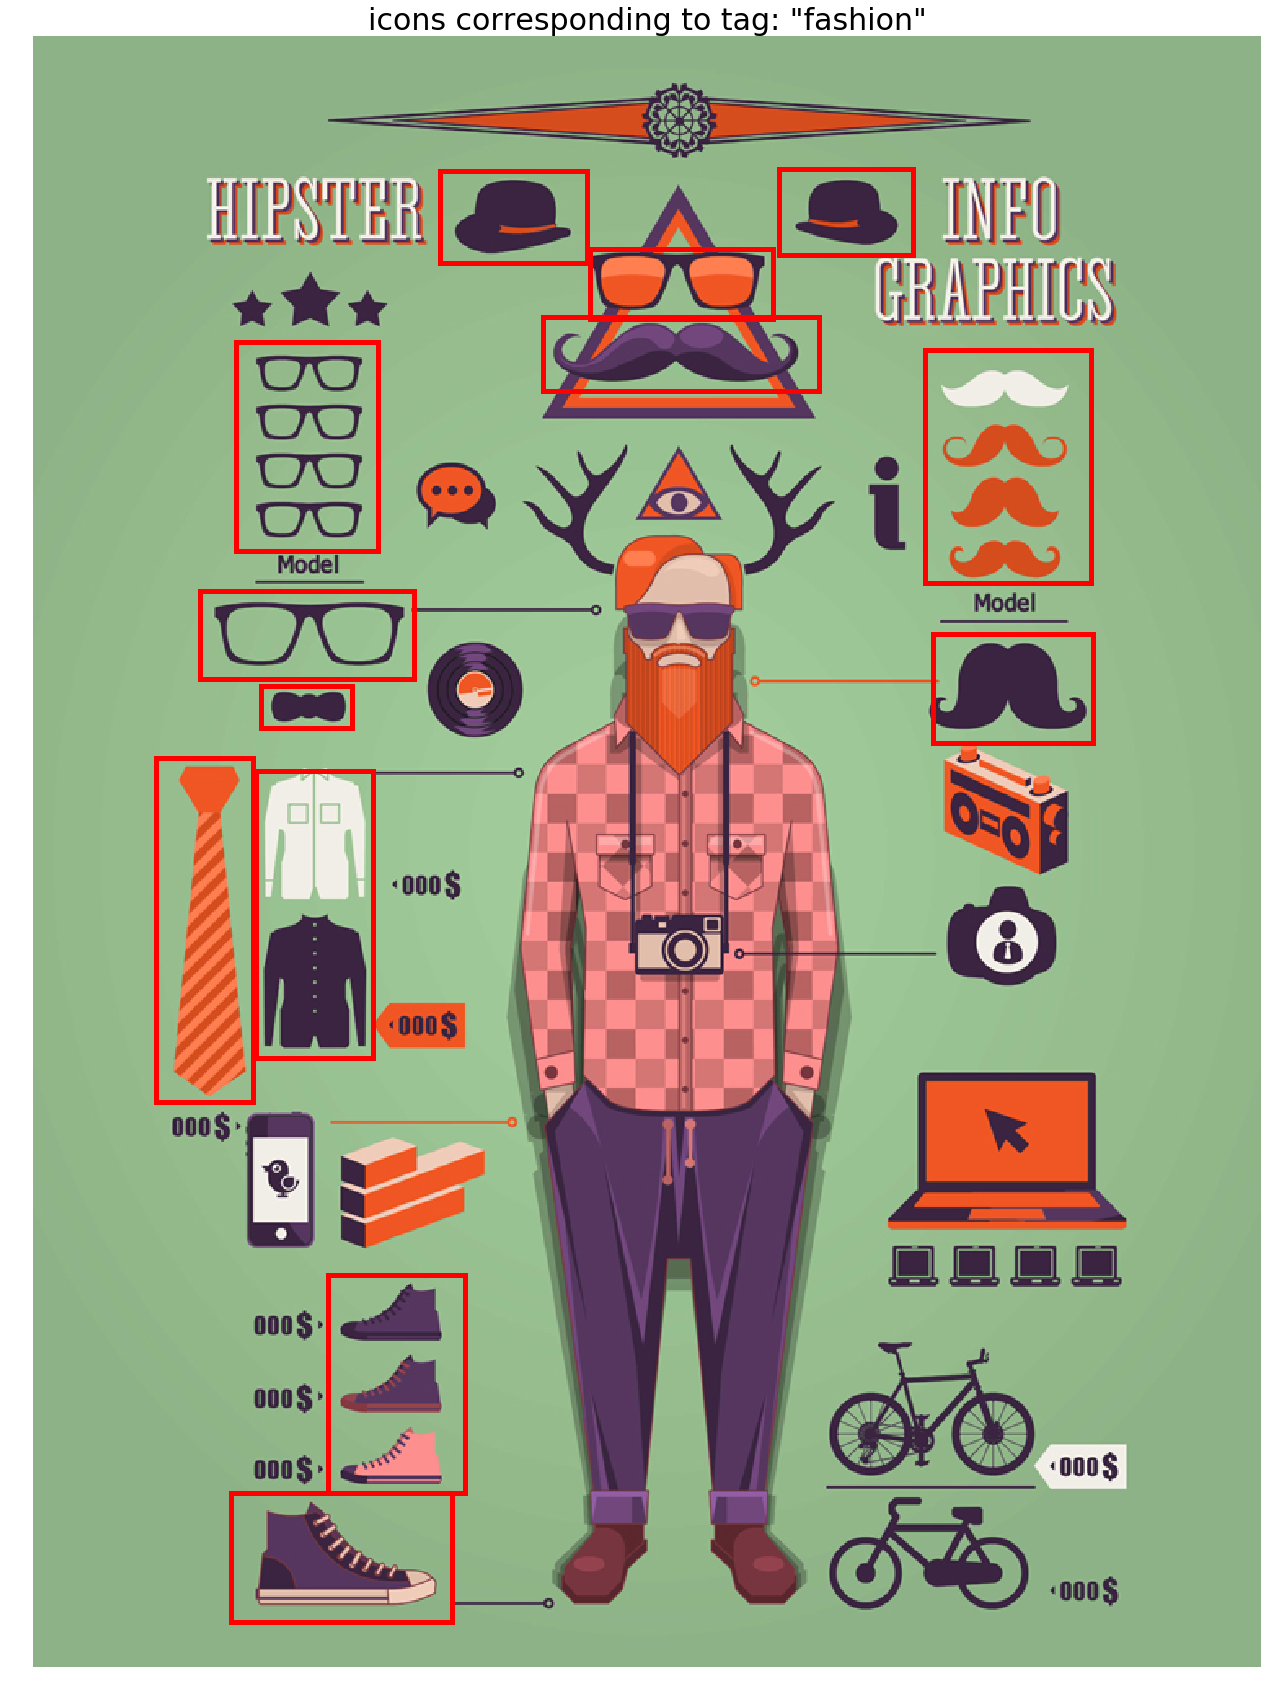

In [20]:
filenames = [key for key in data.keys()]
imfile = random.choice(filenames) # display the annotations for a randomly-selected infographic

im = Image.open(os.path.join(IMDIR,imfile))
w,h = im.size

for tag in data[imfile]:

    fig = plt.figure(figsize=(50,30)); 
    ax = fig.add_subplot(1,1,1)
    ax.imshow(im); plt.axis('off'); 
    plt.title('icons corresponding to tag: "%s"'%tag,fontsize=30)
    
    # original data
    annots = data[imfile][tag]
    for box in annots:
        bottom = int(box['bottom']*h)
        top = int(box['top']*h)
        left = int(box['left']*w)
        right = int(box['right']*w)

        rect = patches.Rectangle((left, bottom), right-left, top-bottom, linewidth=5,edgecolor='r',facecolor='none')
        ax.add_patch(rect) 
        

## Tag-independent icon annotations: ##

In [3]:
# annotations from task where participants marked bounding boxes around all icons on an infographic
icon_dict = pickle.load(open( "icon_annotations_all.pickle", "rb") )
# We split these annotated infographics into 400 for validation (icon_annotations_validation.pickle)
# and 1,000 for testing (icon_annotations_testing.pickle)

Nboxes = [len(icon_dict[entry]) for entry in icon_dict]
print('ANNOTATION STATS:')
print('# images: %d, # boxes: %d, avg # boxes/image: %2.2f'\
      %(len(icon_dict),np.sum(Nboxes),np.mean(Nboxes)))

ANNOTATION STATS:
# images: 1400, # boxes: 21288, avg # boxes/image: 15.21


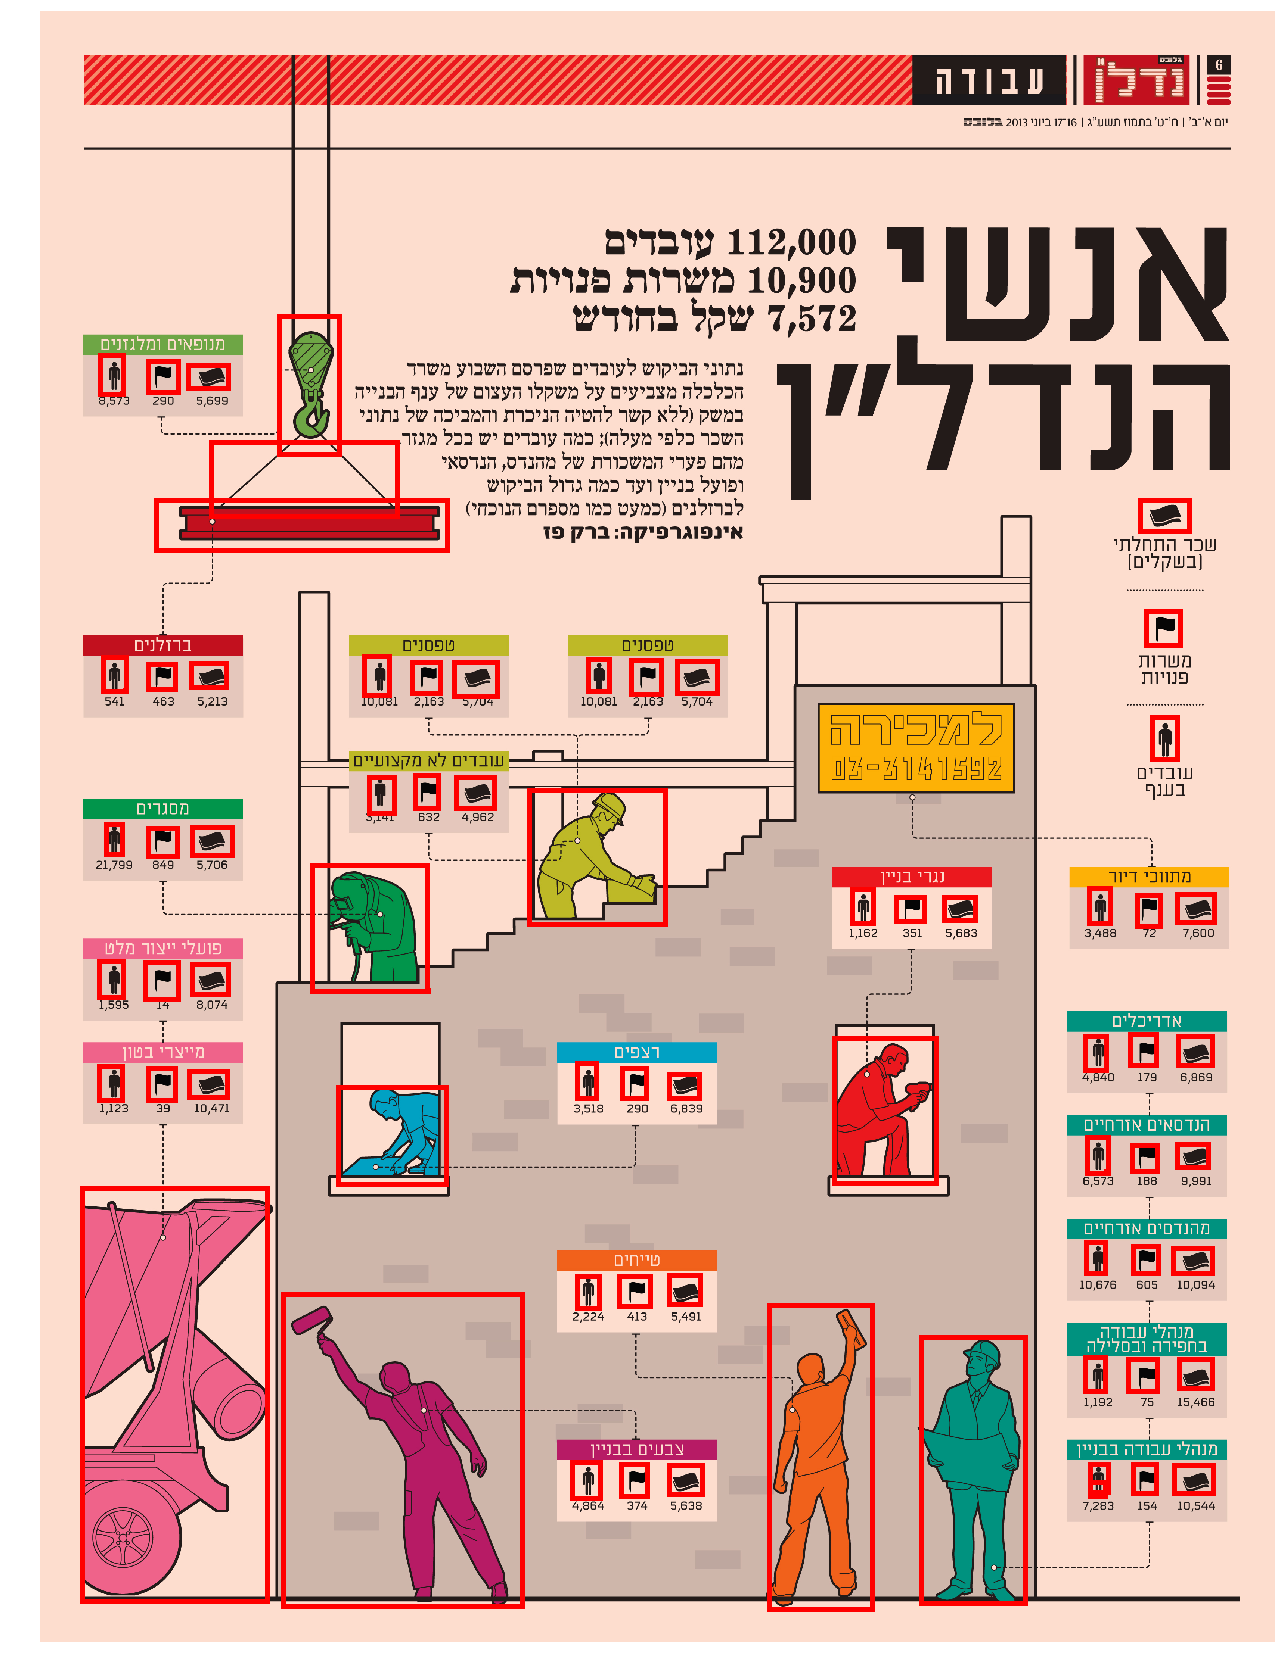

In [4]:
filenames = [key for key in icon_dict.keys()]
imfile = random.choice(filenames) # display the annotations for a randomly-selected infographic

im = Image.open(os.path.join(IMDIR,imfile))
w,h = im.size

fig = plt.figure(figsize=(50,30)); 
ax = fig.add_subplot(1,1,1)
ax.imshow(im); plt.axis('off'); 

# original data
for box in icon_dict[imfile]:
    bottom = int(box['bottom']*h)
    top = int(box['top']*h)
    left = int(box['left']*w)
    right = int(box['right']*w)

    rect = patches.Rectangle((left, bottom), right-left, top-bottom, linewidth=5,edgecolor='r',facecolor='none')
    ax.add_patch(rect) 

In [ ]:
# from the filtering task:
#data = pickle.load(open( "../KimResults/all_1000_data_GT_visualhashtag_annots.p", "rb") )
#data = pickle.load(open( "../KimResults/test_data_GT_visualhashtag_annots.p", "rb") )

In [ ]:
# TODO: representative task data